# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.colors

from matplotlib import colormaps
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* Looking at the shape of the data
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# Checking the column names of Data
columns = df_data.columns
print(f'The column names are: {columns.tolist()}\n')

# Checking the Shape of the Data
df_shape = df_data.shape
print(f'The Data has {df_shape[0]} rows and {df_shape[1]} columns.\n')

# Checking for any NaN values
nan_values = df_data.isna().sum()
print(f'Number of NaN values in each column:\n {nan_values}\n')

# Checking for amy duplicate rows
duplicate_rows = df_data.duplicated().sum()
print(f'The Data has {duplicate_rows} duplicate rows.')

The column names are: ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']

The Data has 4324 rows and 9 columns.

Number of NaN values in each column:
 Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

The Data has 0 duplicate rows.


Here we discovered that there are two columns that seems suspicious of 'Unnamed: 0.1' and 'Unamed: 0'
We also have discovered that the 'Price' column has a lot of NaN values.

## Data Cleaning and Transforming

Removing duplicates, creating columns, and clarifying data





After looking at the two Unnamed columns it is clear they are duplicates of each other and were used for indexing. Our dataframe already keeps an index for us so we'll just delete them.

In [ ]:
# Remove duplicate columns that seemed to act as index

df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Upon inspecting the shape of the data we see that the 'Detail' column has a split in it. This is to seperate the Spacecraft name and the Mission it was on. We're going to split those into two seperate columns and delete the original.

In [ ]:
# Splitting the Detail column to create a spacecraft and mission columns
df_data['Spacecraft'] = df_data['Detail'].str.split('|').str[0].str.rstrip()
df_data['Mission'] = df_data['Detail'].str.split('|').str[1].str.lstrip()

# Dropping off Detail Column
df_data.drop(columns=['Detail'],inplace=True)

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,Spacecraft,Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,50.0,Success,Falcon 9 Block 5,Starlink V1 L9 & BlackSky
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success,Long March 2D,Gaofen-9 04 & Q-SAT
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success,Starship Prototype,150 Meter Hop
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,65.0,Success,Proton-M/Briz-M,Ekspress-80 & Ekspress-103
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,145.0,Success,Atlas V 541,Perseverance


Now we are going to split the Country name out of the Location. We'll leave the 'Location' column for data integrity, but having the Country seperated may prove useful during analysis

In [ ]:
# Adding extra column with name Country creating from Loacation column
df_data['Country'] = df_data['Location'].str.split(', ').str[-1]

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,Spacecraft,Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,50.0,Success,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success,Long March 2D,Gaofen-9 04 & Q-SAT,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success,Starship Prototype,150 Meter Hop,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,65.0,Success,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,145.0,Success,Atlas V 541,Perseverance,USA


Next we see that the 'Date' column isn't in Datetime format. This tends to be useful in analysis so we're going to convert that.

In [ ]:
# Converting Date column to datetime format. Some aspects of column are missing the time, hence mixed format
df_data['Date'] = pd.to_datetime(df_data.Date, utc=True, format='mixed')


Next we are going to convert the 'Price' column to a float. This gives us consistent decimal places with working with the data. I'm also going to rename the column to 'Cost_in_Millions' as when looking at the original data from the scraped site, the price was in millions USD.

In [ ]:
# Converting Price to floats
df_data['Price'] = df_data['Price'].apply(lambda x:str(x).replace(',','')).astype('float64')

# Upon looking at website scraped price should be in millions, clarifying with column name
df_data.rename(columns = {'Price':'Cost_in_Millions'}, inplace = True)


,Organisation,Location,Date,Rocket_Status,Cost_in_Millions,Mission_Status,Spacecraft,Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,50.00,Success,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success,Long March 2D,Gaofen-9 04 & Q-SAT,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success,Starship Prototype,150 Meter Hop,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,65.00,Success,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,145.00,Success,Atlas V 541,Perseverance,USA


Lets check out our data now to make sure all our columns look the way we want

In [ ]:
df_data.head()

,Organisation,Location,Date,Rocket_Status,Cost_in_Millions,Mission_Status,Spacecraft,Mission,Country,Decade,Year,Month,Year_Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,StatusActive,50.00,Success,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,USA,2020,2020,8,2020-08
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,StatusActive,29.75,Success,Long March 2D,Gaofen-9 04 & Q-SAT,CHN,2020,2020,8,2020-08
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,StatusActive,NaN,Success,Starship Prototype,150 Meter Hop,USA,2020,2020,8,2020-08
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,StatusActive,65.00,Success,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,KAZ,2020,2020,7,2020-07
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,StatusActive,145.00,Success,Atlas V 541,Perseverance,USA,2020,2020,7,2020-07


This looks good so far! We may have to add further columns as we dive into our analysis but we can go ahead and start.

## Descriptive Statistics

Next we will look at the statistics of our data to see if there are any obvious errors or items that stick out at us

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Organisation      4324 non-null   object 
 1   Location          4324 non-null   object 
 2   Date              4324 non-null   object 
 3   Rocket_Status     4324 non-null   object 
 4   Cost_in_Millions  964 non-null    float64
 5   Mission_Status    4324 non-null   object 
 6   Spacecraft        4324 non-null   object 
 7   Mission           4324 non-null   object 
 8   Country           4324 non-null   object 
dtypes: float64(1), object(8)
memory usage: 304.2+ KB


Above we see that Cost in Millions has a signifigant portion of null values. This could be to incomplete data or organizations not choosing to disclose data. We should leave this as tranforming the null values to 0 could throw off our analysis, and delete rows with NaN could do the same, but also just keep it in mind

In [ ]:
df_data.describe()

,Cost_in_Millions
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


The data for the cost still describes well with 964 points of data that have a mean of 153.79 million per mission.

# Number of Launches per Company

Below we will look at how many launches per company we we have in our data

<ipython-input-88-b66d5675778e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Organisation', data=df_data,order=df_data["Organisation"].value_counts().index[:20], palette='viridis')


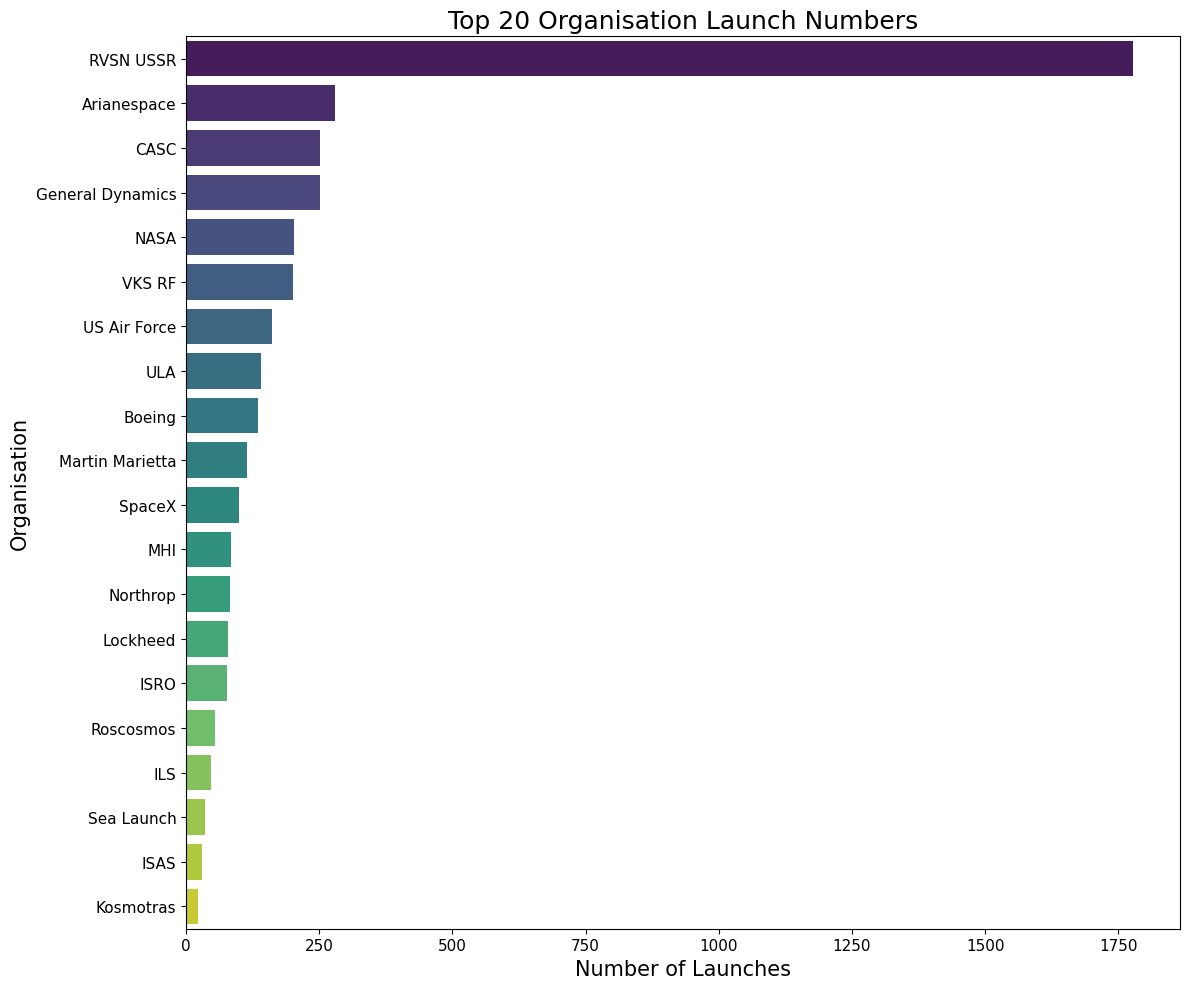

In [ ]:
# Using searborn and matplotlib to create horizontal bar chart

plt.figure(figsize=(12,10)) # Adjusting plot size to fit data appropriately
ax = sns.countplot(y='Organisation', data=df_data,order=df_data["Organisation"].value_counts().index[:20], palette='viridis') # Using first twenty in the index to


ax.set_title("Top 20 Organisation Launch Numbers",fontsize=18)
ax.set_xlabel('Number of Launches',fontsize=15)
ax.set_ylabel("Organisation",fontsize=15)
ax.tick_params(labelsize=11)
plt.tight_layout()

Looking at this data we can clearly see that the RVSN USSR had the most launches in our data by far. Inferences could be made that other countries utliize more organizations, but for now the data speaks for itself.

#Number of launches per Country
We can also break down that data further by country thanks to our earlier tranformation

<ipython-input-292-14e18bc9b6dc>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




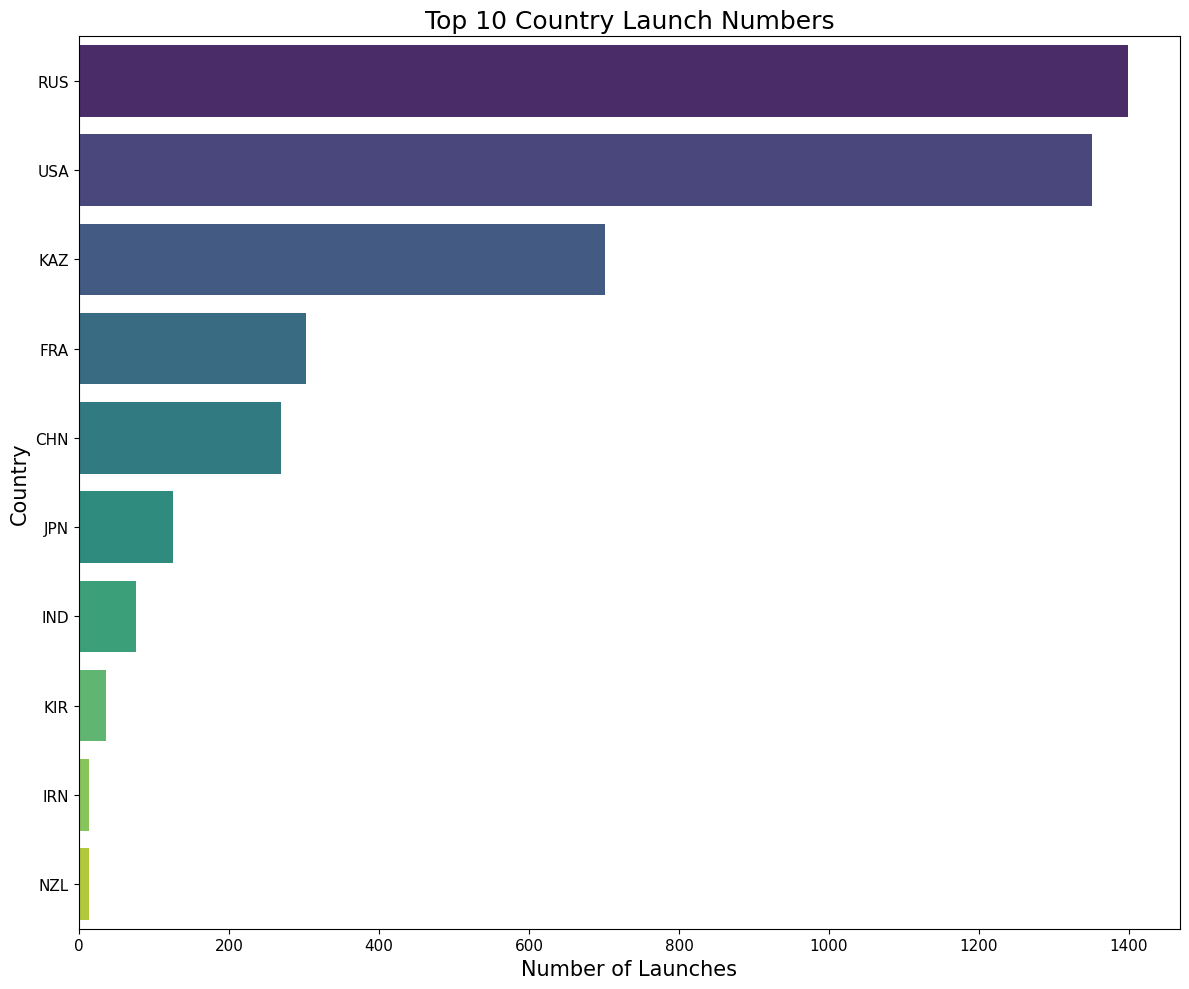

In [ ]:
# Using seaborn and matplotlib to create horizontal bar chart again

plt.figure(figsize=(12,10))
ax = sns.countplot(y='Country', data=df_data,order=df_data["Country"].value_counts().index[:10], palette='viridis') # Using first ten in index


ax.set_title("Top 10 Country Launch Numbers",fontsize=18)
ax.set_xlabel('Number of Launches',fontsize=15)
ax.set_ylabel("Country",fontsize=15)
ax.tick_params(labelsize=11)
plt.tight_layout()

Thanks to this chart we can see that Russia and USA are actually neck and neck for launches. What may throw this off is that Kazakhstan was formely of the USSR, perhaps lending to the organization having so many launches above.

# Number of Active versus Retired Rockets

Next we'll explore how many rockets are active vs retired

In [ ]:
df_data['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [ ]:
# Creating a pie chart to show ratios of active vs retired using plotly express

commission_count = df_data['Rocket_Status'].value_counts()
commission_count.sort_values(ascending=True, inplace=True)

fig = px.pie(labels=commission_count.index,
             values=commission_count.values,
             title='Active Vs Retired Rockets',
             names=commission_count.index,
             hole=0.4, # Turning into donut
             color_discrete_sequence=px.colors.sequential.Viridis)


fig.show()

This data shows that over 80% of rockets launched have been retired. This is probably a good thing as our data goes back into the sixties.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_data['Mission_Status'].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [ ]:
# Creating another pie chart using plotly express to express launch failures and successes

commission_count = df_data['Mission_Status'].value_counts()
commission_count.sort_values(ascending=True, inplace=True)

fig = px.pie(labels=commission_count.index,
             values=commission_count.values,
             title='Successful Vs Failed Missions',
             names=commission_count.index,
             hole=0.4,
             color_discrete_sequence=px.colors.sequential.Viridis)


fig.show()

This chart shows the overwhelming sucess rate of almost 90%. Although it would be amazing to see all rocket launches succeed it sadly isn't so, even with some of the worlds smartest people working on them.

# How Expensive are the Launches?

Here we will get into cost of launches. Rockets are expensive and for now we're going to look at the combined cost of every rocket producer per year. Remember these are in millions of USD.

In [ ]:
# Using a technique I learned from Angela Yu for breaking data into decades
# Then never using it, but deciding it may be good to keep it incase I come back to analyze further

dt_index = pd.DatetimeIndex(df_data.Date)
years = dt_index.year
decades = years//10*10
df_data['Decade'] = decades

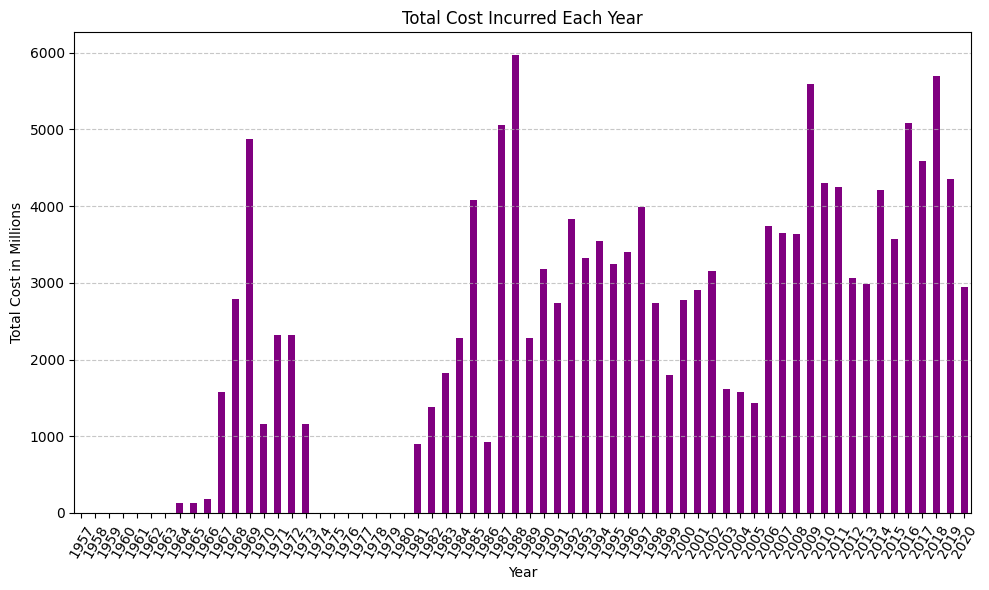

In [ ]:
# Using matplotlib to create a bar chart showing the cost incurred for launches each year

df_data['Year'] = df_data['Date'].dt.year
yearly_costs = df_data.groupby('Year')['Cost_in_Millions'].sum()



plt.figure(figsize=(10, 6))
yearly_costs.plot(kind='bar', color='purple')
plt.title('Total Cost Incurred Each Year')
plt.xlabel('Year')
plt.ylabel('Total Cost in Millions')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here we can see a distinct rise and decline of rocket expenditure. I would caution putting too much faith in this chart though, as roughly only a quarter of all missions reported a cost. That's a lot of missing money. Especially in the seventies when the space race was on its later stages.

# Visualizing Launches by Country

Below we'll be looking at a good visualizion of how many launches each country has performed.

To do that first we need to convert the country names into a code that our chart can understand.

In [ ]:
# In order for IS03166 to pickup country codes for plotting, they must be converted
df_data['Country'].replace(
    {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    },
    inplace=True
)
df_data['Country'] = df_data['Country'].apply(lambda x: countries.get(x).alpha3)
df_data['Country'].value_counts()

Country
RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: count, dtype: int64

##Above we have each country code with how many launches it performed, but we still want a good visualization of it.

In [ ]:
# Choropleth charts are my favorite and plotly express makes them easy

launches_per_country = df_data['Country'].value_counts()

world_map = px.choropleth(
    launches_per_country,
    locations=launches_per_country.index,
    color=launches_per_country,
    title = 'Number of Launches by Country'
)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

Here we are! There's a lot more blank space on that map than colored. It shows how just a few nations of the world are launching us into space.

# Use a Choropleth Map to Show the Number of Failures by Country

While we are at it we may as well take a look at launch failures in the same format

In [ ]:
failures_per_country = df_data[df_data['Mission_Status'] == 'Failure']['Country'].value_counts()

In [ ]:
# Using another choropleth chart

px.choropleth(
    failures_per_country,
    locations=failures_per_country.index,
    color=failures_per_country,
    title = 'Number of Failures by Country'
)

The USA seems to be leading the group in this statistic. Let's dive more into that.

#Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
# Aside from choropleths, Sunburst charts are really my favorite
# Easy to click and dive further into data

px.sunburst(df_data, path=['Country', 'Organisation', 'Mission_Status'], title='Mission Status by Country and Organization')

Here is a very useful chart that breaks down each country into what organization it uses and whether or not the missions succeeded. Now we can really drill down into the successess and failures of rocket launches.

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

We already looked at how much the world spent on Space Missions, but lets break that down further into organizations. Remember, these are in millions of USD and only one quarter of missions reported cost. So these numbers do not hold much trust.

In [ ]:
# Group Total Money Spent by Organization
money_spent_by_organization = df_data.groupby('Organisation')['Cost_in_Millions'].sum()
money_spent_by_organization[money_spent_by_organization!=0]

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Cost_in_Millions, dtype: float64

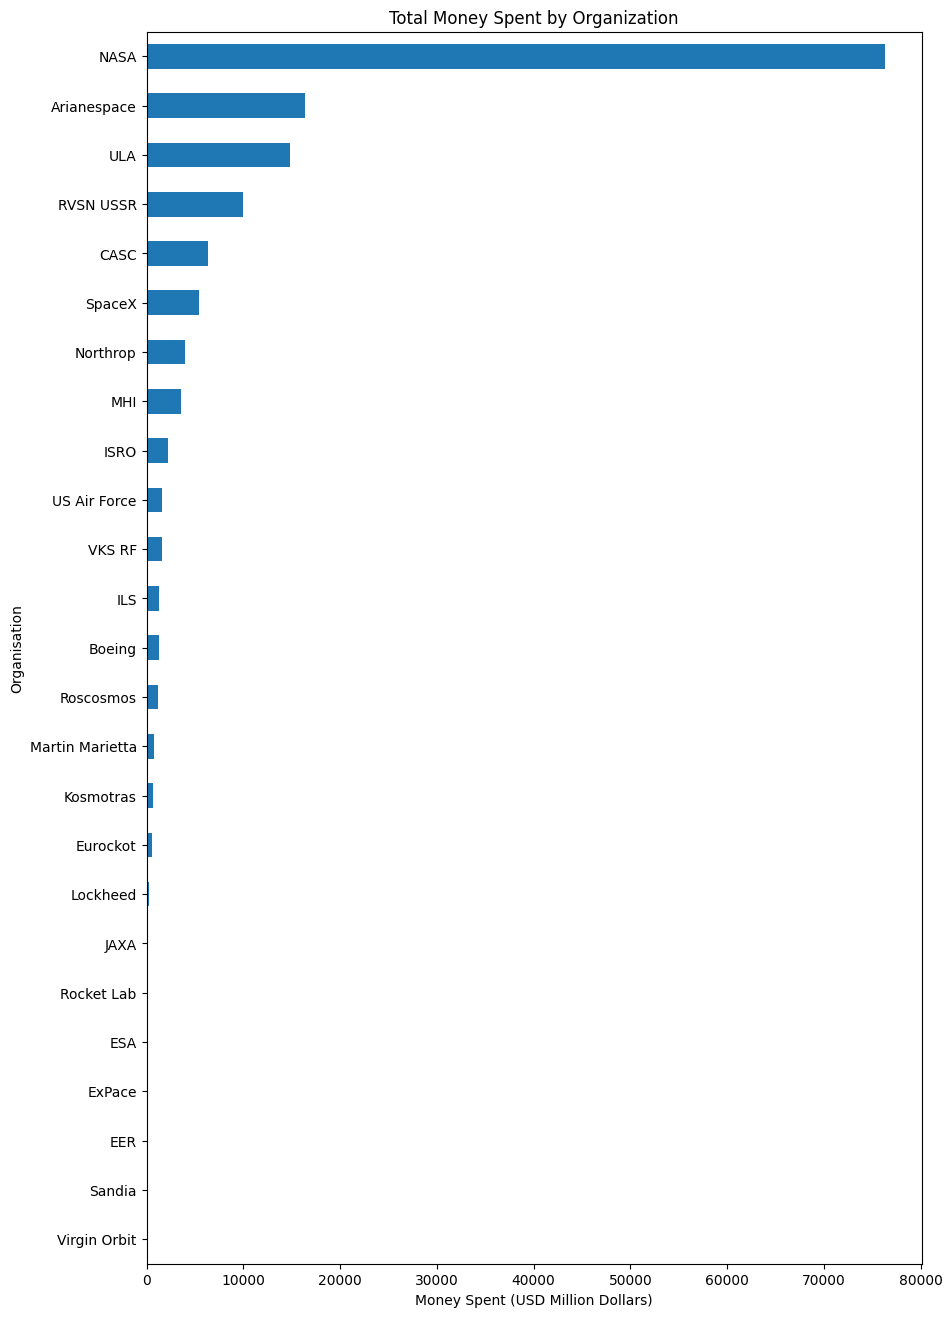

In [ ]:
# A simple horizontal bar chart made with matplotlib

money_spent_by_organization[money_spent_by_organization!=0].sort_values().plot(
    kind='barh',
    title = 'Total Money Spent by Organization',
    figsize=(10,16)
)

plt.xlabel('Money Spent (USD Million Dollars)')
plt.show()

NASA clearly REPORTED the most spendings of any organization when it was fifth in launches in earlier data. The cost may not be the most trustworth column, or NASA may be really good at spending a lot of money.

#Amount of Money Spent by Organisation per Launch

In [ ]:
avg_money_spent = df_data.dropna(subset=['Cost_in_Millions'])
avg_cost_by_org = avg_money_spent.groupby('Organisation')['Cost_in_Millions'].mean().sort_values()

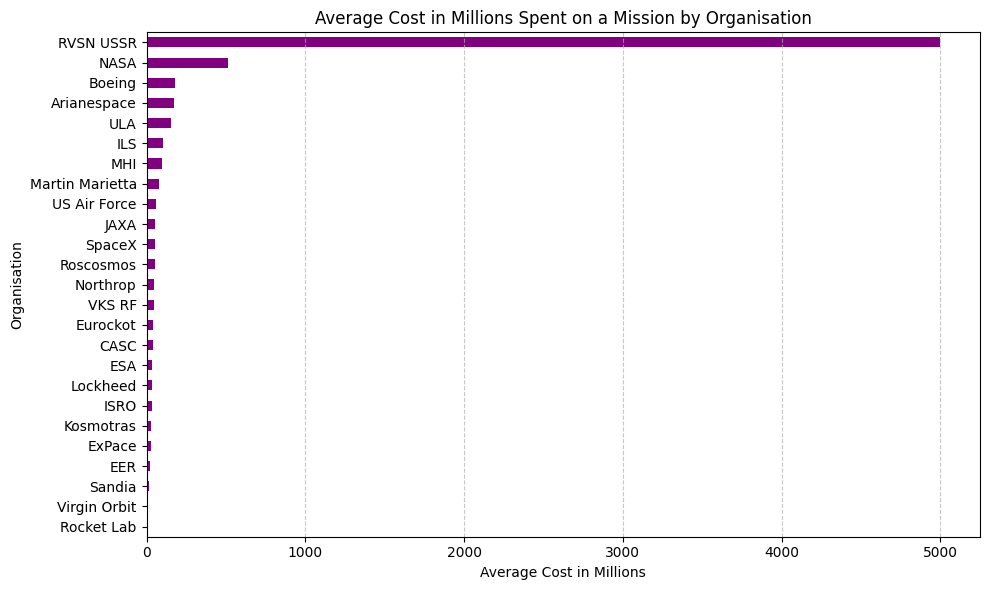

In [ ]:
# Another bar chart ade wiith matplotlib

plt.figure(figsize=(10, 6))
avg_cost_by_org.plot(kind='barh', color='purple')
plt.title('Average Cost in Millions Spent on a Mission by Organisation')
plt.xlabel('Average Cost in Millions')
plt.ylabel('Organisation')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cost is proving tricky to analyze in this dataframe. It appears that the RVSN USSR averaged exactly 5,000,000,000 per reported mission.

# Chart the Number of Launches per Year

Lets analyse the launches again and plot them on chart to see if there's a trend.

In [ ]:
df_data['Year'] = df_data['Date'].dt.year
launches_per_year = df_data.groupby('Year')['Mission'].count()

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Mission, Length: 64, dtype: int64

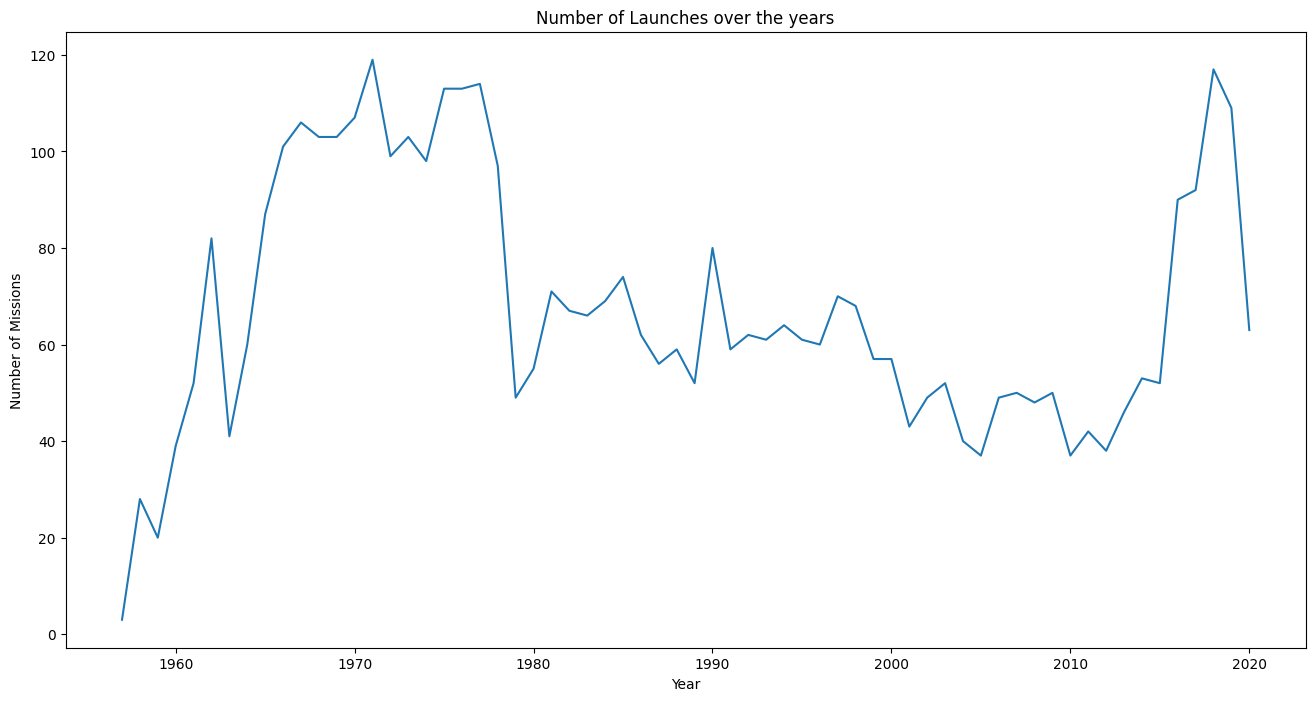

In [ ]:
# A line chart made with matplotlib

launches_per_year.plot(
    title='Number of Launches over the years',
    figsize = (16,8)
)

plt.ylabel('Number of Missions')
plt.show()

Here we can see a huge spike as the space race began and a dip as it ended in the late 70s, with a slow degredation. In the mid 2010's it seems space travel is back on the rise! The dip at the end is likely due to an incomplete year being reported.

#Number of Launches Month-on-Month until the Present

Let's write a little code to find out the most popular month ever for launching space missions!

In [ ]:
# Had to add a Year_Month column here for my next analysis as trying to analyze month without it clumped all same months together despite year
df_data['Year_Month'] = df_data['Date'].dt.to_period('M')
missions_per_month = df_data['Year_Month'].value_counts().sort_index()

most_missions_month = missions_per_month.idxmax()
most_missions_count = missions_per_month.max()

print(f"The month with the most missions is: {most_missions_month}")
print(f"Number of missions in that month: {most_missions_count}")

The month with the most missions is: 1971-12
Number of missions in that month: 18


<ipython-input-171-f6f089157d13>:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



So it appears, December 1971 humanity launched 18 rockets and we haven't topped that month since!

Lets put our data into a rolling monthly average.

<Axes: title={'center': 'Rolling Average of Missions By'}, xlabel='Year_Month'>

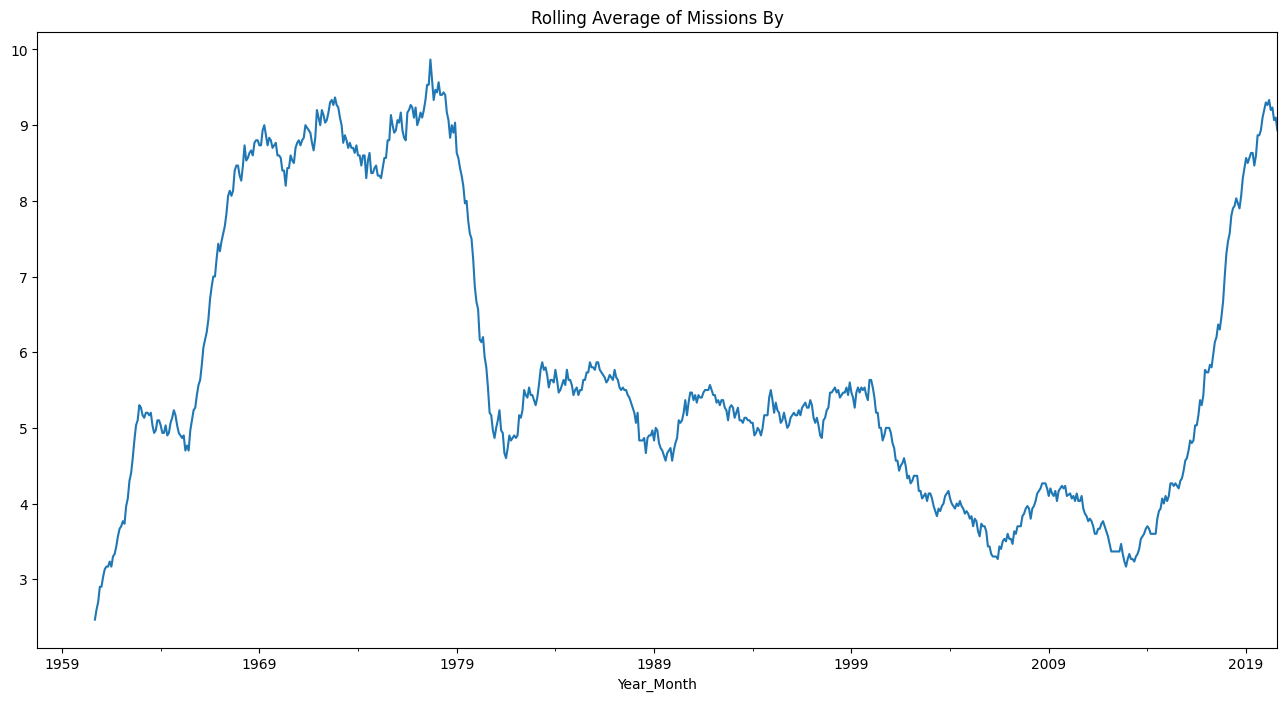

In [ ]:
# An attempt to flesh out more detail in the above chart. Not sure if the effort was worth it

missions_per_month.rolling(30).mean().plot(
    figsize = (16,8),
    title = 'Rolling Average of Missions By Month'
)

It doesn't apear that this data is much different from our Yearly launch data, which is to be expected. Just a little variance in it.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better launch conditions than others. Which time of year seems to be best for space missions?

In [ ]:
# This next chart allowed me to clump the same months
df_data['Month'] = pd.DatetimeIndex(df_data.Date).month
month_wise_missions = df_data.groupby('Month')['Month'].count()

<ipython-input-174-14d36fde335a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




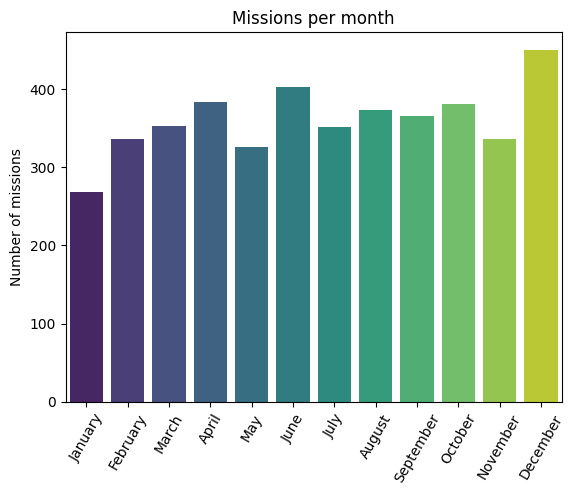

In [ ]:
# Back to a simple bar chart with matplotlib and seaborn

plt.title('Missions per month')
sns.barplot(x=pd.to_datetime(month_wise_missions.index, format = '%m').month_name(), y=month_wise_missions, palette='viridis')
plt.xticks(rotation=60)
plt.ylabel('Number of missions')
plt.xlabel('');

It appears month doesn't play too much of a factor, but December is on top.

# How has the Launch Price varied Over Time?

We know we have incomplete data when it comes to cost. But perhaps with what we have we can still model a trend when it comes to pricing a rocket launch.

In [ ]:
price_over_time = df_data.dropna().groupby('Date')['Cost_in_Millions'].mean() # Had to drop NA here and not just convert to 0

Date
1964-09-01 15:00:00+00:00    63.23
1964-12-10 16:52:00+00:00    63.23
1965-02-11 15:19:00+00:00    63.23
1965-05-06 15:00:00+00:00    63.23
1966-07-29 18:43:00+00:00    59.00
                             ...  
2020-07-25 03:13:00+00:00    64.68
2020-07-30 11:50:00+00:00   145.00
2020-07-30 21:25:00+00:00    65.00
2020-08-06 04:01:00+00:00    29.75
2020-08-07 05:12:00+00:00    50.00
Name: Cost_in_Millions, Length: 963, dtype: float64

<Axes: title={'center': 'Average Launch Price over Time'}, xlabel='Date'>

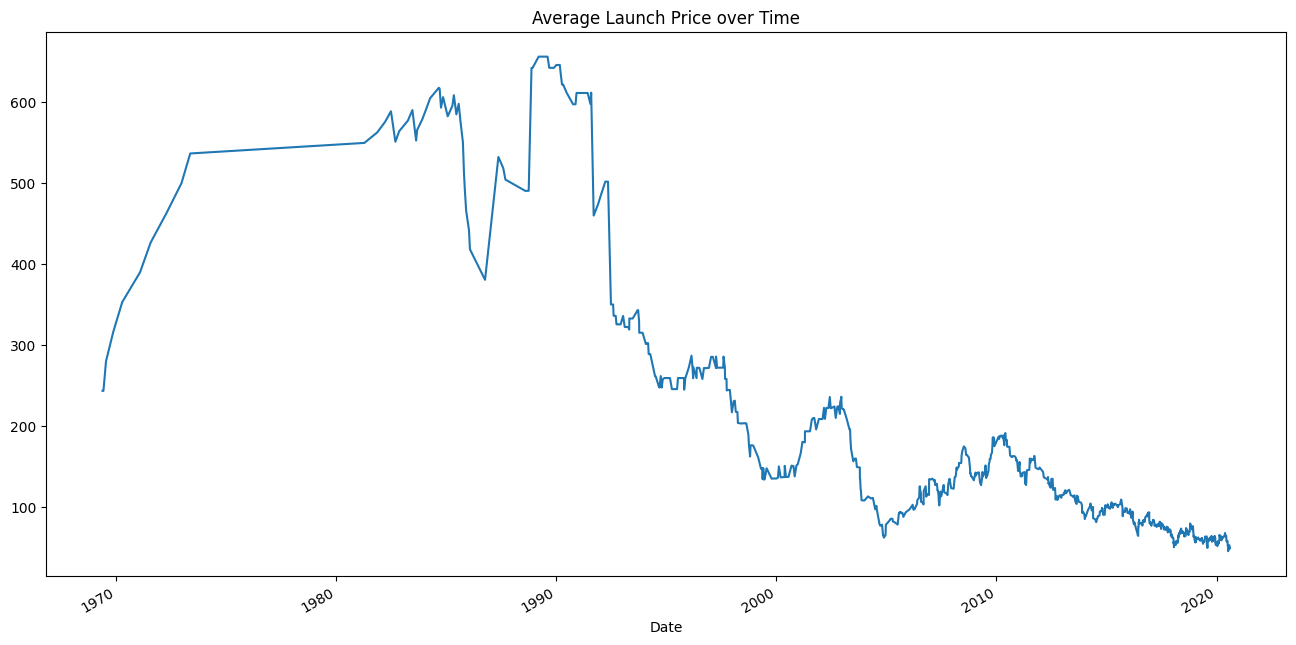

In [ ]:
# Plotting a simple line chart for Price over Time

price_over_time.rolling(30).mean().plot(
    figsize = (16,8),
    title = 'Average Launch Price over Time'
)

It's shocking to see the decline of cost for rocket lauches. Maybe this is due to recycling components or wider availability of specialized parts.

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
top_10_organisations = df_data['Organisation'].value_counts().sort_values(ascending=False)[:10].index.tolist() # Finding top 10 organisations

In [ ]:
# Filters df_data to include only rows where Organisation column is in top_10_organisations list
df_top_10 = df_data[df_data['Organisation'].isin(top_10_organisations)]

# Groups by year and organisation, then counts number of missions. Unstack level=1 transforms Organisation to columns
launches_by_top_10 = df_top_10.groupby(['Year', 'Organisation'])['Mission'].count().unstack(level=1)
# Replaces NaNs with 0, so if no launches, then 0
launches_by_top_10.fillna(0, inplace=True)

# Reset index turns year index into column, melt rashapes DataFrame into long format, results three columns: Year, Org, Number of Missions
launches_by_top_10 = launches_by_top_10.reset_index().melt(id_vars='Year', value_name='Number of Missions', var_name='Organisation')

In [ ]:
# Using plotly express to make a detailed line chart with top ten orgs

l_chart = px.line(launches_by_top_10,
                  x='Year',
                  y='Number of Missions',
                  color='Organisation',
                  title='Number of Launches over time by Top 10 Organisations')

# Update the layout of the chart
l_chart.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Missions',
    height=600,  # Set the height of the chart
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2,  # Move the legend below the plot
        xanchor="center",
        x=0.5,
        title='',
        font=dict(size=10),  # Adjust the font size
        itemwidth=80,  # Adjust the width of each legend item
    )
)

# Show the chart
l_chart.show()

It's plain to see that RVSN USSR was putting our more space missions than any other organization, especially during the space race.

It's also interesting to see that the US Air force led launches as well before completely dropping off.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. We've already seen how the Space Race and it affected numbers, lets dive into that more and create a data set based on those years to analyze.

Kazahkhstan was part of the USSR back then so we'll include it with the Russian Federation for our numbers.

In [ ]:
cold_war_df = df_data[df_data['Year']<=1991].sort_values('Year').reset_index(drop=True)

# Replace Kazakhstan with Russian Federation, since at that time Kazakhstan is part of the Soviet Republic
cold_war_df['Country'].replace(
    {'KAZ':'RUS'},
    inplace=True
)

ussr_vs_usa = cold_war_df[cold_war_df['Country'].isin(['RUS','USA'])] #This df will be used alot for next charts

## Comparing the total number of launches of the USSR and the USA

Now that we have that data lets look at a chart comparing USA and USSR launches.

In [ ]:
px.pie(
    title = 'Total Number of Launches (USSR vs USA)',
    values = ussr_vs_usa['Country'].value_counts(),
    names = ussr_vs_usa['Country'].value_counts().index,
    color_discrete_sequence=px.colors.sequential.Viridis
)

The USSR was putting out nearly three times as many launches as the USA. No wonder the USA was desperate to do something amazing like the Moon Landing.


##Total Number of Launches Year-On-Year by the Two Superpowers

Lets look at how those numbers changed over time.

In [ ]:
# Groups by year and country, each combination then counts the missions status giving number of missions. Unstack transforms country level of index into columns with year as row index
cold_war_launch_by_year = ussr_vs_usa.groupby(['Year','Country'])['Mission_Status'].count().unstack(level=1)

<Axes: title={'center': 'Total Launches by Year (USSR vs USA)'}, xlabel='Year'>

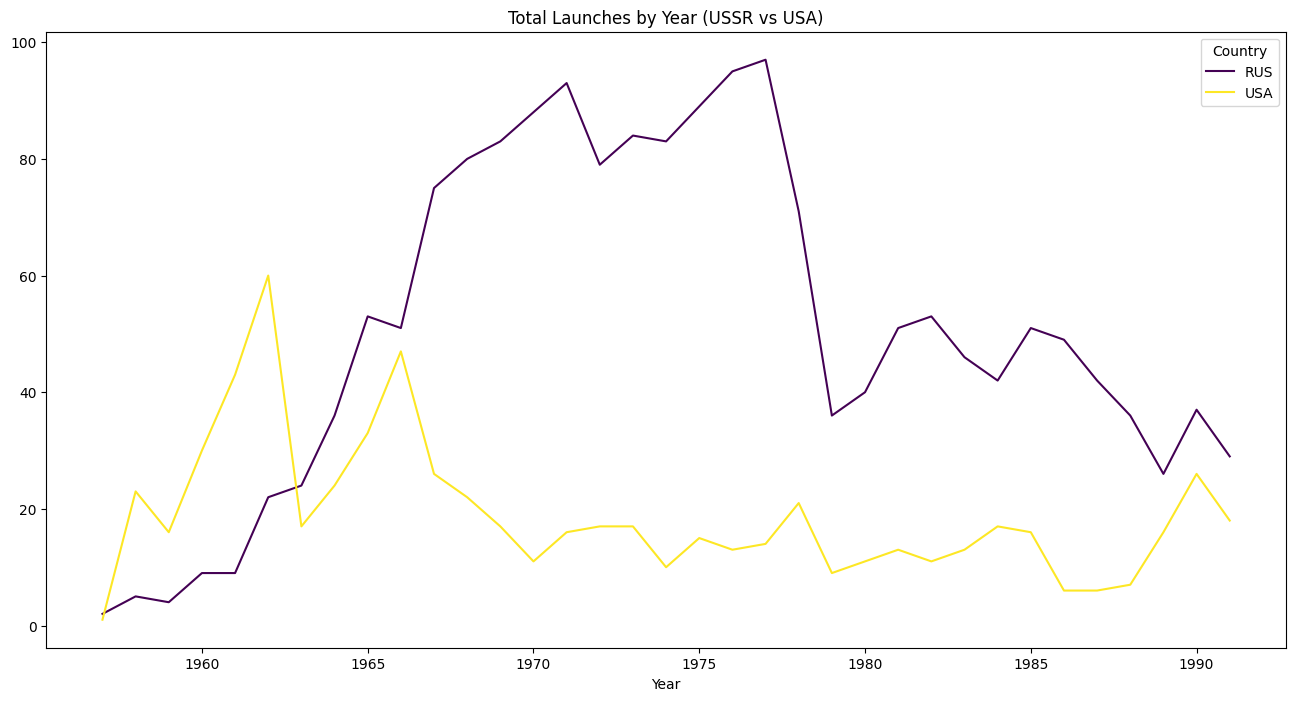

In [ ]:
cold_war_launch_by_year.plot(
    figsize = (16,8),
    title = 'Total Launches by Year (USSR vs USA)',
    colormap='viridis'
)

The USA started out strong with a surge of launches, but dropped down as the USSR slowly grew past the USA. The USSR stayed firmly ahead until the end of the Cold War.


##Total Number of Launch Failures Year-On-Year by the Two Superpowers

We see the USSR had more lauches, but lets explore the failed launches to see who was ahead in that department.

In [ ]:
# Filters df to include only the rows where missions status is not 'Success', then groups by year and country and counts number of mission failures for each. Unstack again tronsforms country level of index to columns
cold_war_mission_failures_by_year = ussr_vs_usa[ussr_vs_usa['Mission_Status']!='Success'].groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
# Filling in Nan values
cold_war_mission_failures_by_year.fillna(0, inplace=True)

<Axes: title={'center': 'Total Mission Failures by Year (USSR vs USA)'}, xlabel='Year'>

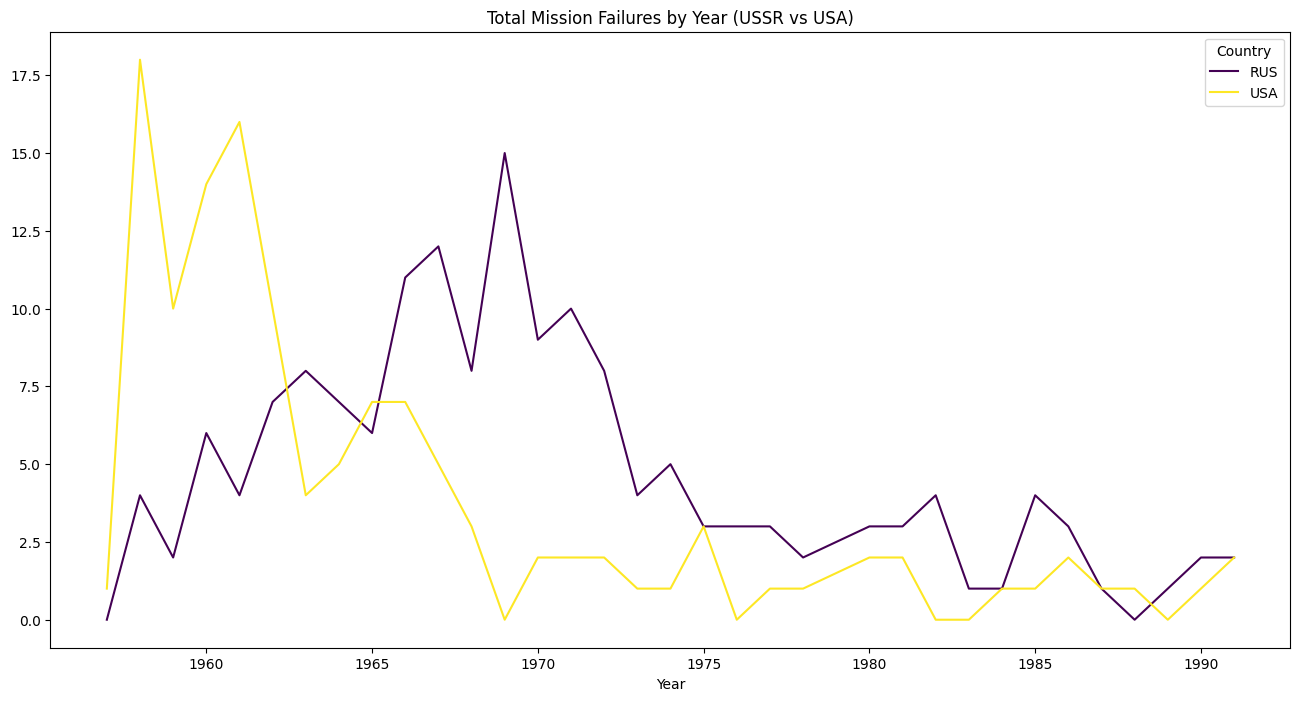

In [ ]:
cold_war_mission_failures_by_year.plot(
    figsize = (16,8),
    title = 'Total Mission Failures by Year (USSR vs USA)',
    colormap='viridis'
)

It looks like the USA's spike and then decline can be attributed to so many failures. Maybe the slowed down after so many launch failures, before getting it steadily under control. The USSR matches a similar story, but more in line with their slow rise into space missions.

## Percentage of Failures over Time

Lets test that hypothesis

In [ ]:
# Failure Percentage = number of unsuccessful missions / number of missions * 100
cold_war_failpct_by_year = cold_war_mission_failures_by_year/cold_war_launch_by_year * 100
cold_war_failpct_by_year.fillna(0, inplace=True)

<Axes: title={'center': 'Mission Failure Percentage by Year (USSR vs USA)'}, xlabel='Year'>

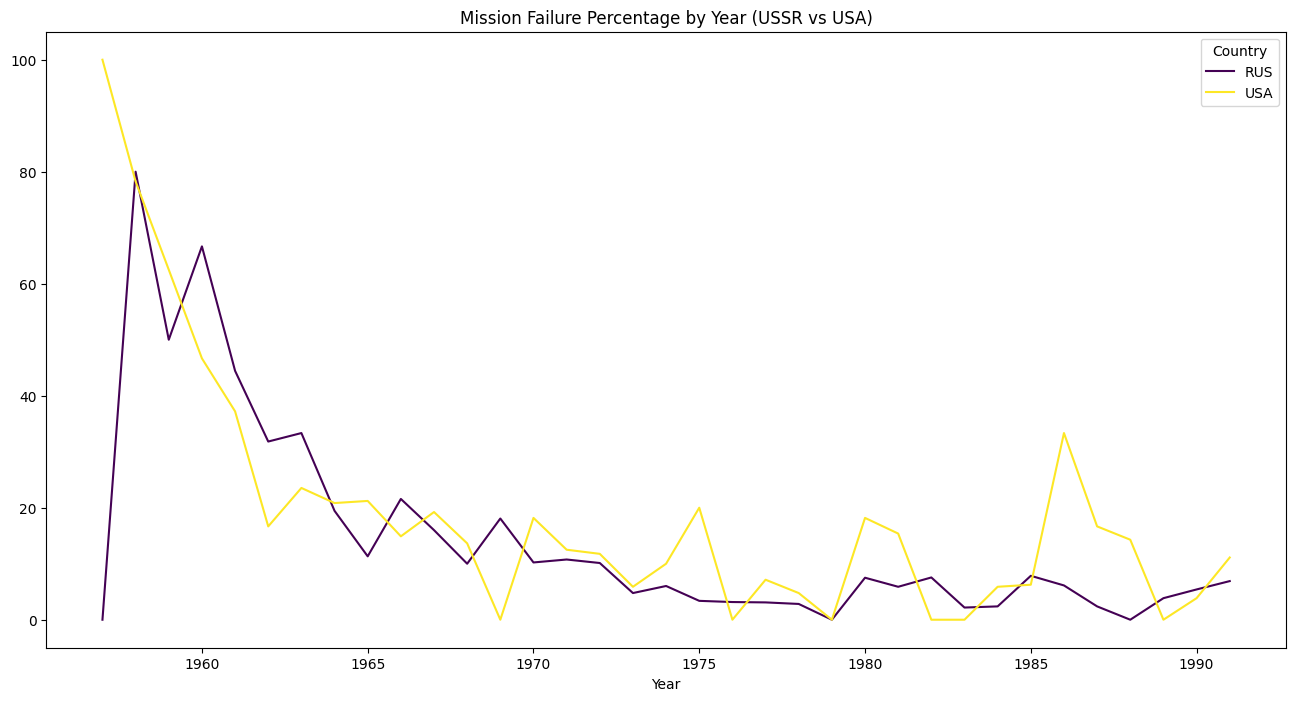

In [ ]:
cold_war_failpct_by_year.plot(
    figsize = (16,8),
    title = 'Mission Failure Percentage by Year (USSR vs USA)',
    colormap='viridis'
)

It seems pretty accurate. Both started with higher failure percentages that seemed to come down as time went on. With a few odd exceptions from the USA that is...

## Total Launches Across Time

Lets pivot back to seeing a different visualization of how many space missions were launched in totality by each country.

In [ ]:
 # Grouping by COuntry and Year, size counts number or rows in each group. Index=false makes sure a new index isn't created
launches_by_country_per_year = df_data.groupby(['Country', 'Year'], as_index=False).size()
# Renames the size column to 'Mission_Count
launches_by_country_per_year.rename(columns={'size': 'Mission_Count'}, inplace=True)
# Fills in Nan values
launches_by_country_per_year.fillna(0, inplace=True)
launches_by_country_per_year = launches_by_country_per_year.sort_values('Year') # Sorts by year
# Groups by country & year then calculates sum of each mission_count for each group (helps in the next step).
# groupby(level=0).cumsum() groups by country referring to first level of index,
# then calculates cumulative sum of 'Mission_Count' within each country group. reset_index() coverts grouped index back into columns
launches = launches_by_country_per_year.groupby(['Country', 'Year'])['Mission_Count'].sum().groupby(level=0).cumsum().reset_index()




l_chart = px.line(launches,
                  x='Year',
                  y='Mission_Count',
                  color='Country',
                  hover_name='Country',
                  color_discrete_sequence=px.colors.sequential.Viridis)

# Update the layout of the chart
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')

l_chart.show()

Here we can see the USA has slowly caught up with Russia over time. Kazakhstan has slowed down in recent years but still has one of the largest launch sites that Russia still operates.

# A View of Launches Per Year by Country

Here is a view of launches by country per year to see a breakdown of how each country performed every year.

In [ ]:
# This code is recycled from before
launches_by_country_per_year = df_data.groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
# Fill in Nan values again
launches_by_country_per_year.fillna(0, inplace=True)

# Reshaped data to combine Mission_Status into number of missions, melting into long format
launches_by_country_per_year = launches_by_country_per_year.reset_index().melt(id_vars='Year', value_name='Number of Missions', var_name='Country')

In [ ]:
# Plotly express line chart
l_chart = px.line(launches_by_country_per_year,
                  x='Year',
                  y='Number of Missions',
                  color='Country',
                  title='Number of Launches by Country over the Years',
                  color_discrete_sequence=px.colors.sequential.Viridis)

# Update the layout of the chart
l_chart.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Missions',
    height=700,  # Increase the height of the chart
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.3,  # Move the legend below the plot
        xanchor="center",
        x=0.5,
        title='',
        font=dict(size=10),  # Adjust the font size
        itemwidth=80,  # Adjust the width of each legend item
    )
)

# Show the chart
l_chart.show()

It seems this data falls in line with our other data but shows a clearer picture of Russia's decline of Space Missions in the modern age. The USA has maintained higher launches in the modern age as expected. However, China has clearly ramped up rocket missions within the last five years of this chart.

# Organisations Doing the Most Number of Launches

Let's look at similar data, but isntead the organizations. I really only want to focus on the big players so a different chart is needed.

In [ ]:
# Group by 'Year' and 'Organisation' and count the number of missions
launches_by_organisation_per_year = df_data.groupby(['Year', 'Organisation'])['Mission_Status'].count().unstack(fill_value=0)

# Reset index to convert the DataFrame from wide to long format
launches_by_organisation_per_year = launches_by_organisation_per_year.reset_index()

# Melt the DataFrame to long format
launches_by_organisation_per_year_melted = pd.melt(launches_by_organisation_per_year, id_vars='Year', var_name='Organisation', value_name='Number of Missions')

In [ ]:
# Create the stacked bar chart using Plotly Express
bar_chart = px.bar(launches_by_organisation_per_year_melted,
                   x='Year',
                   y='Number of Missions',
                   color='Organisation',
                   title='Number of Missions by Organisation over the Years',
                   labels={'Number of Missions': 'Number of Missions'},
                   height=600,
                   barmode='stack',  # Stack bars
                   color_discrete_sequence=px.colors.sequential.Viridis)  # Use Viridis color scale

# Update the layout of the chart
bar_chart.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Missions',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.5,
        xanchor="right",
        x=1,
        title='',
        font=dict(size=10),  # Adjust the font size
        itemwidth=30,  # Adjust the width of each legend item
    )
)

# Show the chart
bar_chart.show()

Here you can see the RVSN USSR was a huge player to begin with, but even before that it was the US Air Force. Nowadays CASC and SpaceX seem to dominate the market.

##Conclusions to Analysis

-  Space Launches really booomed during the era of the Space Race and Cold War but slowed down for decades, only picking back up in recent years.
-  The 'Price' column made analyzing cost difficult but it could still be infered that cost seems to be reducing overtime, possibly due to reusable parts and specialized parts being more common.
-  The dataset held good integrity, despite the 'Price' column having so many NaN values
-  Success rate is on the rise in the modern age.
-  Not only do the key countries change in which dominate space launches, but now private organizations such as SpaceX are one of the largest to launch into space.
